## Installing and Importing libraries

In [ ]:
!pip3 install SoundFile

In [ ]:
!pip3 install librosa

In [9]:
#importing libraries
import librosa 
import numpy as np
import soundfile as sf
import math
import os
import json
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
import matplotlib.pyplot as plt
import random

## Audio Data Preprocessing

In [39]:
#Setting paths for input and out data
#voice recording length of audio files is of 4 sec so setting the duration of 4 sec. 
#Note: Any duration less than of 4 sec can capture noice and can have huge impact on teh accuracy of the data
IN_PATH = "audio_data"
OUT_PATH = "speech_data.json"
#DURATION_SAMPLE =4
SAMPLE_RATE = 22050
DURATION = 4

#In order to carry out speech recognition we need to extract MFCC values.The audio MFCC blocks extracts coefficients from an audio signal. 

SAMPLES_PER_USER  = SAMPLE_RATE * DURATION
def extract_mfcc(in_path, out_path, n_mfcc=5, n_fft = 2048, hop_length= 512, num_segments = 3):
    data = {
        "Users": [],
        "mfcc" : [],
        "labels" : []
    }
    
    
    num_samples_per_segment = int(SAMPLES_PER_USER/ num_segments)
    expected_num_mfcc_vectors_per_segment = math.ceil(num_samples_per_segment / hop_length)

    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(in_path)): 
        
        if dirpath is not in_path:
            dirpath_components = dirpath.split("/")
            semantic_label = dirpath_components[-1]
            data["Users"].append(semantic_label)
            print("\n Preprocessing{}".format(semantic_label))
            
            #process file for specific users
            for f in filenames: 
                #print("filename{}:".format(f))
                file_path = os.path.join(dirpath, f)
                signal, sr = librosa.load(file_path, sr = SAMPLE_RATE)
                #signal, sr = sf.read(file_path)
                
                for s in range(num_segments):
                 
                    start_sample = num_samples_per_segment * s 
                    finish_sample = start_sample + num_samples_per_segment
                    mfcc = librosa.feature.mfcc(signal[start_sample:finish_sample],
                                               sr = sr,
                                                n_fft = n_fft,
                                                n_mfcc = n_mfcc,
                                                hop_length = hop_length
                                               )
                    mfcc= mfcc.T
                    if len(mfcc) == expected_num_mfcc_vectors_per_segment:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i-1)
                        print("{}, segment:{}".format(file_path, s+1))
            with open(out_path, "w") as fp:
                json.dump(data,fp,indent=4)
## Main section to call functions                  
if __name__ == "__main__":
    extract_mfcc(IN_PATH, OUT_PATH, num_segments = 3)
        


 Preprocessingaudio_data\1688
audio_data\1688\audio_data_librispeech_test-other_1688_1688-142285-0000.flac, segment:1
audio_data\1688\audio_data_librispeech_test-other_1688_1688-142285-0000.flac, segment:2
audio_data\1688\audio_data_librispeech_test-other_1688_1688-142285-0000.flac, segment:3
audio_data\1688\audio_data_librispeech_test-other_1688_1688-142285-0001.flac, segment:1
audio_data\1688\audio_data_librispeech_test-other_1688_1688-142285-0001.flac, segment:2
audio_data\1688\audio_data_librispeech_test-other_1688_1688-142285-0001.flac, segment:3
audio_data\1688\audio_data_librispeech_test-other_1688_1688-142285-0002.flac, segment:1
audio_data\1688\audio_data_librispeech_test-other_1688_1688-142285-0002.flac, segment:2
audio_data\1688\audio_data_librispeech_test-other_1688_1688-142285-0003.flac, segment:1
audio_data\1688\audio_data_librispeech_test-other_1688_1688-142285-0003.flac, segment:2
audio_data\1688\audio_data_librispeech_test-other_1688_1688-142285-0003.flac, segment:3
a

audio_data\2414\audio_data_librispeech_test-other_2414_2414-128291-0004.flac, segment:1
audio_data\2414\audio_data_librispeech_test-other_2414_2414-128291-0004.flac, segment:2
audio_data\2414\audio_data_librispeech_test-other_2414_2414-128291-0004.flac, segment:3
audio_data\2414\audio_data_librispeech_test-other_2414_2414-128291-0005.flac, segment:1
audio_data\2414\audio_data_librispeech_test-other_2414_2414-128291-0005.flac, segment:2
audio_data\2414\audio_data_librispeech_test-other_2414_2414-128291-0005.flac, segment:3
audio_data\2414\audio_data_librispeech_test-other_2414_2414-128291-0006.flac, segment:1
audio_data\2414\audio_data_librispeech_test-other_2414_2414-128291-0006.flac, segment:2
audio_data\2414\audio_data_librispeech_test-other_2414_2414-128291-0007.flac, segment:1
audio_data\2414\audio_data_librispeech_test-other_2414_2414-128291-0007.flac, segment:2
audio_data\2414\audio_data_librispeech_test-other_2414_2414-128291-0007.flac, segment:3
audio_data\2414\audio_data_libri

audio_data\367\audio_data_librispeech_test-other_367_367-130732-0003.flac, segment:1
audio_data\367\audio_data_librispeech_test-other_367_367-130732-0003.flac, segment:2
audio_data\367\audio_data_librispeech_test-other_367_367-130732-0003.flac, segment:3
audio_data\367\audio_data_librispeech_test-other_367_367-130732-0004.flac, segment:1
audio_data\367\audio_data_librispeech_test-other_367_367-130732-0004.flac, segment:2
audio_data\367\audio_data_librispeech_test-other_367_367-130732-0004.flac, segment:3
audio_data\367\audio_data_librispeech_test-other_367_367-130732-0005.flac, segment:1
audio_data\367\audio_data_librispeech_test-other_367_367-130732-0005.flac, segment:2
audio_data\367\audio_data_librispeech_test-other_367_367-130732-0005.flac, segment:3
audio_data\367\audio_data_librispeech_test-other_367_367-130732-0007.flac, segment:1
audio_data\367\audio_data_librispeech_test-other_367_367-130732-0007.flac, segment:2
audio_data\367\audio_data_librispeech_test-other_367_367-130732-0

Data Successfully Loaded
Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_14 (Flatten)         (None, 290)               0         
_________________________________________________________________
dense_56 (Dense)             (None, 524)               152484    
_________________________________________________________________
dense_57 (Dense)             (None, 128)               67200     
_________________________________________________________________
dense_58 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_59 (Dense)             (None, 10)                650       
Total params: 228,590
Trainable params: 228,590
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1/1 [==============================] - 1s 1s/step - loss: 143.6498 - accuracy

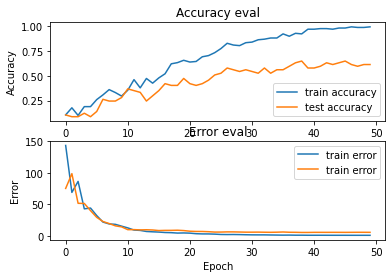

In [40]:
DATASET_PATH = "speech_data.json"
def extract_data(dataset_path):
    with open(dataset_path, "r") as fp:
        data = json.load(fp)
    
    #convert a list into numpy array
    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    print("Data Successfully Loaded")
    return X,y

def plot_history(history):
    fig, axs = plt.subplots(2)
    
    axs[0].plot(history.history["accuracy"],label="train accuracy")
    axs[0].plot(history.history["val_accuracy"],label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc = "lower right")
    axs[0].set_title("Accuracy eval")
     
    axs[1].plot(history.history["loss"],label="train error")
    axs[1].plot(history.history["val_loss"],label="train error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc = "upper right")
    axs[1].set_title("Error eval")
    plt.show()


if __name__ =="__main__":
    X, y = extract_data(DATASET_PATH)

    #split the data in train and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)
    
#build the network architecture
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(X.shape[1], X.shape[2])),
    
    #first hidden layer.layers
    keras.layers.Dense(524, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
   
    
    #second hidden layer
    keras.layers.Dense(128, activation="relu",kernel_regularizer=keras.regularizers.l2(0.001)),
 
    #third hidden layer
    keras.layers.Dense(64, activation= 'relu',kernel_regularizer=keras.regularizers.l2(0.001)),
 
    keras.layers.Dense(10, activation='softmax')
])

#compile the network
optimiser = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=optimiser,
             loss="sparse_categorical_crossentropy",
             metrics = ["accuracy"])
model.summary()
#train the network
history= model.fit(X_train, y_train, validation_data=(X_test, y_test),
         epochs=50,
         batch_size = 512)
plot_history(history)